<a href="https://colab.research.google.com/github/gokhanturer/NER_Model_Training/blob/main/MTL_Bioinformatics_2016_to_CoNLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

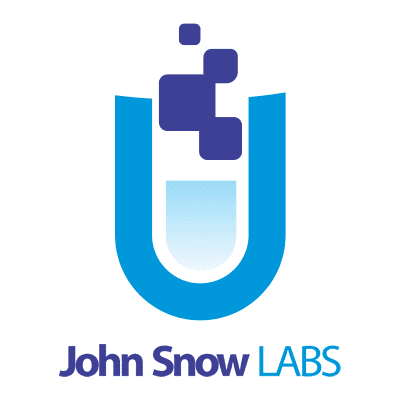

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("max_rows",100)

## Getting Train Data (BC5CDR-disease-IOB) 

In [ ]:
!wget -q https://raw.githubusercontent.com/cambridgeltl/MTL-Bioinformatics-2016/master/data/BC5CDR-disease-IOB/train.tsv

In [ ]:
with open("train.tsv") as f:
  train_data = f.read()

In [ ]:
train_data

'Selegiline\tO\n-\tO\ninduced\tO\npostural\tB-Disease\nhypotension\tI-Disease\nin\tO\nParkinson\tB-Disease\n\'\tI-Disease\ns\tI-Disease\ndisease\tI-Disease\n:\tO\na\tO\nlongitudinal\tO\nstudy\tO\non\tO\nthe\tO\neffects\tO\nof\tO\ndrug\tO\nwithdrawal\tO\n.\tO\n\nOBJECTIVES\tO\n:\tO\nThe\tO\nUnited\tO\nKingdom\tO\nParkinson\tB-Disease\n\'\tI-Disease\ns\tI-Disease\nDisease\tI-Disease\nResearch\tO\nGroup\tO\n(\tO\nUKPDRG\tO\n)\tO\ntrial\tO\nfound\tO\nan\tO\nincreased\tO\nmortality\tO\nin\tO\npatients\tO\nwith\tO\nParkinson\tB-Disease\n\'\tI-Disease\ns\tI-Disease\ndisease\tI-Disease\n(\tO\nPD\tB-Disease\n)\tO\nrandomized\tO\nto\tO\nreceive\tO\n10\tO\nmg\tO\nselegiline\tO\nper\tO\nday\tO\nand\tO\nL\tO\n-\tO\ndopa\tO\ncompared\tO\nwith\tO\nthose\tO\ntaking\tO\nL\tO\n-\tO\ndopa\tO\nalone\tO\n.\tO\n\nRecently\tO\n,\tO\nwe\tO\nfound\tO\nthat\tO\ntherapy\tO\nwith\tO\nselegiline\tO\nand\tO\nL\tO\n-\tO\ndopa\tO\nwas\tO\nassociated\tO\nwith\tO\nselective\tO\nsystolic\tB-Disease\northostatic\tI-Disea

### Converting .tsv to .CoNLL

In [ ]:
def data_pre_process(data):

  result = []

  for i in data.split("\n"):
    if i == "": # Each sentence ends ""
      result.append("None\tNone") # We add "None" between each sentences
    else:
      result.append(i)
  
  df = pd.DataFrame(result)

  return df

In [ ]:
def conll_generator(data, filename):

  data = data_pre_process(data)

  data.to_csv(filename) # We saved the return value of the data_prepare_function as csv file

  df = pd.read_csv(filename, sep = "\t", usecols = [0,1],names = ['token','entity'])

  # We read csv file , add column name and assigned a NaN value to first row 
  df.iloc[0,:] = np.nan
  
  # After reading the data, we cleaned the unnecessary characters in the columns.
  df["token"] = df["token"].map(lambda x: x.split(",")[1], na_action = "ignore")
  df["token"] = df["token"].map(lambda x: ',' if x == '"' else x, na_action = "ignore")
  df["entity"] = df["entity"].map(lambda x: x.strip('"'), na_action = "ignore")

  # We assigned the value np.nan to the places that are None
  df["token"]= df["token"].map(lambda x: np.nan if x == 'None' else x)
  df["entity"] = df["entity"].map(lambda x: np.nan if x == 'None' else x)

  # We added two new columns with value "NN" excluding NaN values
  df["pos1"] = df["token"].map(lambda x: np.nan if type(x)== float else 'NN')
  df["pos2"] = df["token"].map(lambda x: np.nan if type(x)== float else 'NN')

  df = df[["token","pos1","pos2","entity"]]

  # We changed the column names according to the conll format
  df.columns = ["-DOCSTART-", "-X-", "-X-", "O"]

  return df

In [ ]:
data = train_data

filename = "train_data.csv"

train_data = conll_generator(data, filename)

In [ ]:
train_data.head(20)

-DOCSTART-  -X-  -X-          O
0            NaN  NaN  NaN        NaN
1     Selegiline   NN   NN          O
2              -   NN   NN          O
3        induced   NN   NN          O
4       postural   NN   NN  B-Disease
5    hypotension   NN   NN  I-Disease
6             in   NN   NN          O
7      Parkinson   NN   NN  B-Disease
8              '   NN   NN  I-Disease
9              s   NN   NN  I-Disease
10       disease   NN   NN  I-Disease
11             :   NN   NN          O
12             a   NN   NN          O
13  longitudinal   NN   NN          O
14         study   NN   NN          O
15            on   NN   NN          O
16           the   NN   NN          O
17       effects   NN   NN          O
18            of   NN   NN          O
19          drug   NN   NN          O

In [ ]:
train_data.to_csv("/content/BC5CDR-disease-IOB_train.conll", index = False, sep = " ")

## Getting Test Data (BC5CDR-disease-IOB) 

In [ ]:
!wget -q https://raw.githubusercontent.com/cambridgeltl/MTL-Bioinformatics-2016/master/data/BC5CDR-disease-IOB/test.tsv

In [ ]:
with open("test.tsv") as f:
  test_data = f.read()
test_data

'Torsade\tB-Disease\nde\tI-Disease\npointes\tI-Disease\nventricular\tB-Disease\ntachycardia\tI-Disease\nduring\tO\nlow\tO\ndose\tO\nintermittent\tO\ndobutamine\tO\ntreatment\tO\nin\tO\na\tO\npatient\tO\nwith\tO\ndilated\tB-Disease\ncardiomyopathy\tI-Disease\nand\tO\ncongestive\tB-Disease\nheart\tI-Disease\nfailure\tI-Disease\n.\tO\n\nThe\tO\nauthors\tO\ndescribe\tO\nthe\tO\ncase\tO\nof\tO\na\tO\n56\tO\n-\tO\nyear\tO\n-\tO\nold\tO\nwoman\tO\nwith\tO\nchronic\tO\n,\tO\nsevere\tO\nheart\tB-Disease\nfailure\tI-Disease\nsecondary\tO\nto\tO\ndilated\tB-Disease\ncardiomyopathy\tI-Disease\nand\tO\nabsence\tO\nof\tO\nsignificant\tO\nventricular\tB-Disease\narrhythmias\tI-Disease\nwho\tO\ndeveloped\tO\nQT\tB-Disease\nprolongation\tI-Disease\nand\tO\ntorsade\tB-Disease\nde\tI-Disease\npointes\tI-Disease\nventricular\tB-Disease\ntachycardia\tI-Disease\nduring\tO\none\tO\ncycle\tO\nof\tO\nintermittent\tO\nlow\tO\ndose\tO\n(\tO\n2\tO\n.\tO\n5\tO\nmcg\tO\n/\tO\nkg\tO\nper\tO\nmin\tO\n)\tO\ndobutamine

### Converting .tsv to .CoNLL

In [ ]:
data = test_data

filename = "test_data.csv"

test_data = conll_generator(data, filename)

In [ ]:
test_data.head(20)

-DOCSTART-  -X-  -X-          O
0              NaN  NaN  NaN        NaN
1          Torsade   NN   NN  B-Disease
2               de   NN   NN  I-Disease
3          pointes   NN   NN  I-Disease
4      ventricular   NN   NN  B-Disease
5      tachycardia   NN   NN  I-Disease
6           during   NN   NN          O
7              low   NN   NN          O
8             dose   NN   NN          O
9     intermittent   NN   NN          O
10      dobutamine   NN   NN          O
11       treatment   NN   NN          O
12              in   NN   NN          O
13               a   NN   NN          O
14         patient   NN   NN          O
15            with   NN   NN          O
16         dilated   NN   NN  B-Disease
17  cardiomyopathy   NN   NN  I-Disease
18             and   NN   NN          O
19      congestive   NN   NN  B-Disease

In [ ]:
test_data.to_csv("/content/BC5CDR-disease-IOB_test.conll", index = False, sep = " ")

## Getting Devel Data (BC5CDR-disease-IOB) 

In [ ]:
!wget -q https://raw.githubusercontent.com/cambridgeltl/MTL-Bioinformatics-2016/master/data/BC5CDR-disease-IOB/devel.tsv

In [ ]:
with open("devel.tsv") as f:
  devel_train_data = f.read()
devel_train_data

'22\tO\n-\tO\noxacalcitriol\tO\nsuppresses\tO\nsecondary\tB-Disease\nhyperparathyroidism\tI-Disease\nwithout\tO\ninducing\tO\nlow\tB-Disease\nbone\tI-Disease\nturnover\tI-Disease\nin\tO\ndogs\tO\nwith\tO\nrenal\tB-Disease\nfailure\tI-Disease\n.\tO\n\nBACKGROUND\tO\n:\tO\nCalcitriol\tO\ntherapy\tO\nsuppresses\tO\nserum\tO\nlevels\tO\nof\tO\nparathyroid\tO\nhormone\tO\n(\tO\nPTH\tO\n)\tO\nin\tO\npatients\tO\nwith\tO\nrenal\tB-Disease\nfailure\tI-Disease\nbut\tO\nhas\tO\nseveral\tO\ndrawbacks\tO\n,\tO\nincluding\tO\nhypercalcemia\tB-Disease\nand\tO\n/\tO\nor\tO\nmarked\tO\nsuppression\tB-Disease\nof\tI-Disease\nbone\tI-Disease\nturnover\tI-Disease\n,\tO\nwhich\tO\nmay\tO\nlead\tO\nto\tO\nadynamic\tB-Disease\nbone\tI-Disease\ndisease\tI-Disease\n.\tO\n\nA\tO\nnew\tO\nvitamin\tO\nD\tO\nanalogue\tO\n,\tO\n22\tO\n-\tO\noxacalcitriol\tO\n(\tO\nOCT\tO\n)\tO\n,\tO\nhas\tO\nbeen\tO\nshown\tO\nto\tO\nhave\tO\npromising\tO\ncharacteristics\tO\n.\tO\n\nThis\tO\nstudy\tO\nwas\tO\nundertaken\tO\nto\tO

### Converting .tsv to .CoNLL

In [ ]:
data = devel_train_data

filename = "devel.csv"

devel_train_data = conll_generator(data, filename)

In [ ]:
devel_train_data.head(20)

-DOCSTART-  -X-  -X-          O
0                   NaN  NaN  NaN        NaN
1                    22   NN   NN          O
2                     -   NN   NN          O
3         oxacalcitriol   NN   NN          O
4            suppresses   NN   NN          O
5             secondary   NN   NN  B-Disease
6   hyperparathyroidism   NN   NN  I-Disease
7               without   NN   NN          O
8              inducing   NN   NN          O
9                   low   NN   NN  B-Disease
10                 bone   NN   NN  I-Disease
11             turnover   NN   NN  I-Disease
12                   in   NN   NN          O
13                 dogs   NN   NN          O
14                 with   NN   NN          O
15                renal   NN   NN  B-Disease
16              failure   NN   NN  I-Disease
17                    .   NN   NN          O
18                  NaN  NaN  NaN        NaN
19           BACKGROUND   NN   NN          O

In [ ]:
devel_train_data.to_csv("/content/BC5CDR-disease-IOB_train_devel.conll", index = False, sep = " ")